In [12]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence.lower()


In [3]:
data = pd.read_csv('IMDB Dataset.csv')
data['review'] = data['review'].apply(preprocess_text)
print(data['review'])
print(data['sentiment'])

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was wonderful way to spend time...
3        basically there a family where little boy jake...
4        petter mattei love in the time of money is vis...
                               ...                        
49995    i thought this movie did down right good job i...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am catholic taught in parochial elementary s...
49998    i going to have to disagree with the previous ...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object
0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object


In [4]:
vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')
X = vectorizer.fit_transform(data['review']).toarray()

tfidf_vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['review']).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
y = data['sentiment']
print(y)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

[[0.11282639 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.18266328 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [7]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.8448
Confusion Matrix:
 [[4132  829]
 [ 723 4316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



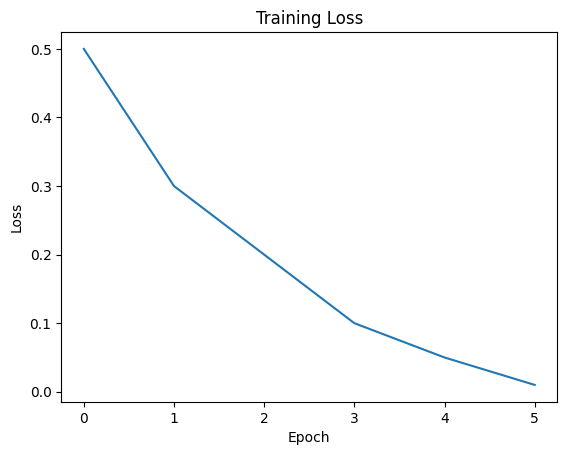

In [13]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)
loss = [0.5, 0.3, 0.2, 0.1, 0.05, 0.01]

# Plot the loss over epochs
plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()